<a href="https://colab.research.google.com/github/jamesodendal/ML-Projects/blob/master/CLASSIFICAITON_MNIST_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classification"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [5]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version = 1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])

#  Scikit-Learn Datasets have the followin dictionary structure :

DESCR key: describing the dataset

data key: containing an array with one row per instance and one column per feature

A target key containing an array with the labels


In [6]:
X,y = mnist['data'], mnist['target']
X.shape


(70000, 784)

In [7]:
y.shape

(70000,)

Saving figure some_digit_plot


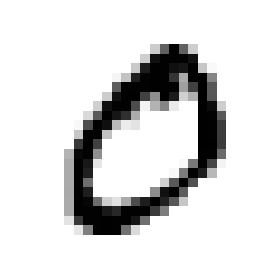

In [8]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = X[1]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap=mpl.cm.binary)
plt.axis("off")

save_fig("some_digit_plot")
plt.show()

no really sure what this looks like = 0 

but we can check it with the label 

In [9]:
y[1]

'0'

its the number 5 packed inside of a string, this is a good indication taht we have to change this. Rememeber ML algorithms dont really like strings. So here lets cast y to intergers.

In [10]:
y[0]

'5'

In [11]:
y  = y.astype(np.uint8)

In [12]:
y

array([5, 0, 4, ..., 4, 5, 6], dtype=uint8)

In [13]:
y[1]

0

As you can see the strings are now turned into integers

In [14]:
# EXTRA
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

Saving figure more_digits_plot


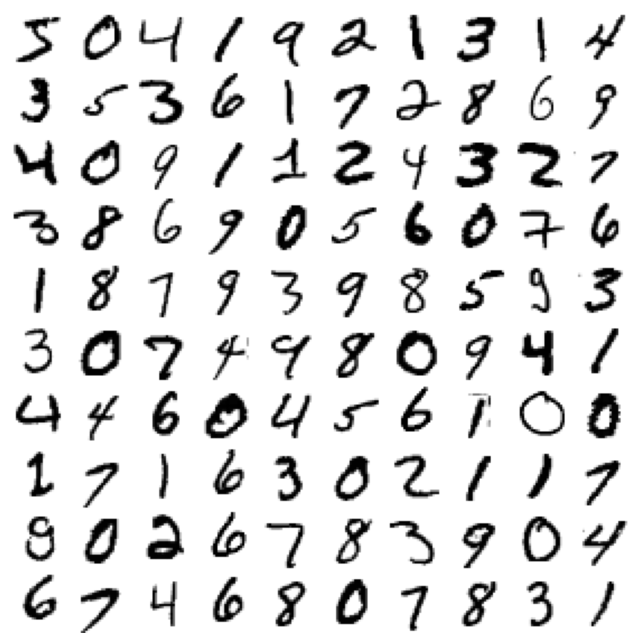

In [15]:
plt.figure(figsize=(9,9))
example_images = X[:100]
plot_digits(example_images, images_per_row=10)
save_fig("more_digits_plot")
plt.show()

Before we start splitting the data into train and test sets 

The MNIST dataset is actually already split into a training set 

We can investigate what the split in the data looks like using by checking the X_train, X_test, y_train, y_test which is based on the (from sklearn.model_selection import train_test_split)

In [16]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [17]:
X_train.shape

(60000, 784)

In [18]:
X_test.shape

(10000, 784)

In [19]:
y_train.shape

(60000,)

In [20]:
y_test.shape

(10000,)

From the data we can see that we have 7000 imagse in total and 784 features. 

train splits has 60 000 images 

test split containt set the last 10 000 images

This mean that the data is split in a approximatly 17% (test) to 83 % (train)

# Training Binary Classifier 

Initailly a simple test would be to identify one digit.

I will attempt to do this with the number 0. This number detector (number 0) will be an example of a binary classifer, that can distinguish between 0 and not-0

In [21]:
y_train_0 = (y_train == 0)  # True for all 0s, False for all other digits
y_test_0 = (y_test == 0)

In [22]:
from sklearn.linear_model import SGDClassifier

# remember to set the random_state if you want reproducible data
m_sgd_clsi = SGDClassifier(random_state=40)
m_sgd_clsi.fit(X_train, y_train_0)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=40, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [23]:
m_sgd_clsi.predict([some_digit])

array([ True])

Classifier guesses that the number to be 0 (True), seems that it made the correct guess.

Lets exchange the number for another see if it selects it correctly this time.

In [24]:
y_train_7 = (y_train == 7)  # True for all 10s, False for all other digits
y_test_7 = (y_test == 7)

In [25]:
# remember to set the random_state if you want reproducible data
m_sgd_clsi_7 = SGDClassifier(random_state=40)
m_sgd_clsi_7.fit(X_train, y_train_7)
m_sgd_clsi_7.predict([some_digit])

array([False])

Saving figure some_digit_plot


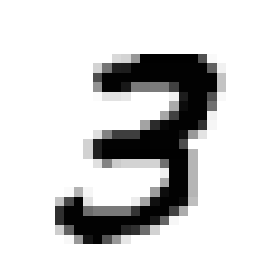

In [26]:
some_digit = X[7]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap=mpl.cm.binary)
plt.axis("off")

save_fig("some_digit_plot")
plt.show()

# Performance Features

## Cross Validation Implementation

Here is a method for a implementing a cross-validation since scikit-learn provides little more control over the cross-validation process but it is similar to cross_val_score() function 

In [27]:
from sklearn.model_selection import StratifiedKFold


from sklearn.base import clone


strikfold_10 = StratifiedKFold(n_splits = 10,  random_state = 42)

for train_index, test_index in strikfold_10.split(X_train, y_train_0):
    clone_clsi = clone(m_sgd_clsi)
    X_train_fld = X_train[train_index]
    y_train_fld = y_train_0[train_index]
    
    X_test_fld = X_train[test_index]
    y_test_fld = y_train_0[test_index]
    
    clone_clsi.fit(X_train_fld, y_train_fld)
    y_predict = clone_clsi.predict(X_test_fld)
    n_corrt = sum(y_predict == y_test_fld)
    print(n_corrt / len(y_predict))



/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


0.9896666666666667
0.9888333333333333
0.988
0.984
0.9888333333333333
0.9786666666666667
0.9878333333333333
0.9866666666666667
0.986
0.989


In [28]:
strikfold_9 = StratifiedKFold(n_splits = 9,  random_state = 42)

for train_index, test_index in strikfold_9.split(X_train, y_train_0):
    clone_clsi = clone(m_sgd_clsi)
    X_train_fld = X_train[train_index]
    y_train_fld = y_train_0[train_index]
    
    X_test_fld = X_train[test_index]
    y_test_fld = y_train_0[test_index]
    
    clone_clsi.fit(X_train_fld, y_train_fld)
    y_predict = clone_clsi.predict(X_test_fld)
    n_corrt = sum(y_predict == y_test_fld)
    print(n_corrt / len(y_predict))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


0.9875506224688766
0.9877006149692515
0.9877006149692515
0.9901004949752512
0.9884505774711264
0.9905504724763762
0.9878487848784878
0.9864986498649865
0.9885988598859886


In [29]:
strikfold_8 = StratifiedKFold(n_splits = 8,  random_state = 42)

for train_index, test_index in strikfold_8.split(X_train, y_train_0):
    clone_clsi = clone(m_sgd_clsi)
    X_train_fld = X_train[train_index]
    y_train_fld = y_train_0[train_index]
    
    X_test_fld = X_train[test_index]
    y_test_fld = y_train_0[test_index]
    
    clone_clsi.fit(X_train_fld, y_train_fld)
    y_predict = clone_clsi.predict(X_test_fld)
    n_corrt = sum(y_predict == y_test_fld)
    print(n_corrt / len(y_predict))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


0.9905333333333334
0.9877333333333334
0.9877333333333334
0.9726666666666667
0.9878666666666667
0.9826666666666667
0.9865333333333334
0.9845333333333334


In [30]:
strikfold_7 = StratifiedKFold(n_splits = 7,  random_state = 42)

for train_index, test_index in strikfold_7.split(X_train, y_train_0):
    clone_clsi = clone(m_sgd_clsi)
    X_train_fld = X_train[train_index]
    y_train_fld = y_train_0[train_index]
    
    X_test_fld = X_train[test_index]
    y_test_fld = y_train_0[test_index]
    
    clone_clsi.fit(X_train_fld, y_train_fld)
    y_predict = clone_clsi.predict(X_test_fld)
    n_corrt = sum(y_predict == y_test_fld)
    print(n_corrt / len(y_predict))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


0.9882174521698553
0.9875174988334111
0.9885674288380775
0.9871660249679151
0.9880994049702485
0.984249212460623
0.9863493174658733


In [31]:
strikfold_6 = StratifiedKFold(n_splits = 6,  random_state = 42)

for train_index, test_index in strikfold_6.split(X_train, y_train_0):
    clone_clsi = clone(m_sgd_clsi)
    X_train_fld = X_train[train_index]
    y_train_fld = y_train_0[train_index]
    
    X_test_fld = X_train[test_index]
    y_test_fld = y_train_0[test_index]
    
    clone_clsi.fit(X_train_fld, y_train_fld)
    y_predict = clone_clsi.predict(X_test_fld)
    n_corrt = sum(y_predict == y_test_fld)
    print(n_corrt / len(y_predict))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


0.9846
0.986
0.9845
0.9874
0.9864
0.9891


In [32]:
strikfold_5 = StratifiedKFold(n_splits = 5,  random_state = 42)

for train_index, test_index in strikfold_5.split(X_train, y_train_0):
    clone_clsi = clone(m_sgd_clsi)
    X_train_fld = X_train[train_index]
    y_train_fld = y_train_0[train_index]
    
    X_test_fld = X_train[test_index]
    y_test_fld = y_train_0[test_index]
    
    clone_clsi.fit(X_train_fld, y_train_fld)
    y_predict = clone_clsi.predict(X_test_fld)
    n_corrt = sum(y_predict == y_test_fld)
    print(n_corrt / len(y_predict))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


0.981
0.9785
0.9844166666666667
0.98875
0.9863333333333333


In [33]:
strikfold_4 = StratifiedKFold(n_splits = 4,  random_state = 42)

for train_index, test_index in strikfold_4.split(X_train, y_train_0):
    clone_clsi = clone(m_sgd_clsi)
    X_train_fld = X_train[train_index]
    y_train_fld = y_train_0[train_index]
    
    X_test_fld = X_train[test_index]
    y_test_fld = y_train_0[test_index]
    
    clone_clsi.fit(X_train_fld, y_train_fld)
    y_predict = clone_clsi.predict(X_test_fld)
    n_corrt = sum(y_predict == y_test_fld)
    print(n_corrt / len(y_predict))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


0.9886666666666667
0.9882
0.9868666666666667
0.9848


In [34]:
strikfold_3 = StratifiedKFold(n_splits = 3,  random_state = 42)

for train_index, test_index in strikfold_3.split(X_train, y_train_0):
    clone_clsi = clone(m_sgd_clsi)
    X_train_fld = X_train[train_index]
    y_train_fld = y_train_0[train_index]
    
    X_test_fld = X_train[test_index]
    y_test_fld = y_train_0[test_index]
    
    clone_clsi.fit(X_train_fld, y_train_fld)
    y_predict = clone_clsi.predict(X_test_fld)
    n_corrt = sum(y_predict == y_test_fld)
    print(n_corrt / len(y_predict))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


0.9769
0.98905
0.98745


In [35]:
strikfold_2 = StratifiedKFold(n_splits = 2,  random_state = 42)

for train_index, test_index in strikfold_2.split(X_train, y_train_0):
    clone_clsi = clone(m_sgd_clsi)
    X_train_fld = X_train[train_index]
    y_train_fld = y_train_0[train_index]
    
    X_test_fld = X_train[test_index]
    y_test_fld = y_train_0[test_index]
    
    clone_clsi.fit(X_train_fld, y_train_fld)
    y_predict = clone_clsi.predict(X_test_fld)
    n_corrt = sum(y_predict == y_test_fld)
    print(n_corrt / len(y_predict))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


0.9886666666666667
0.9878333333333333


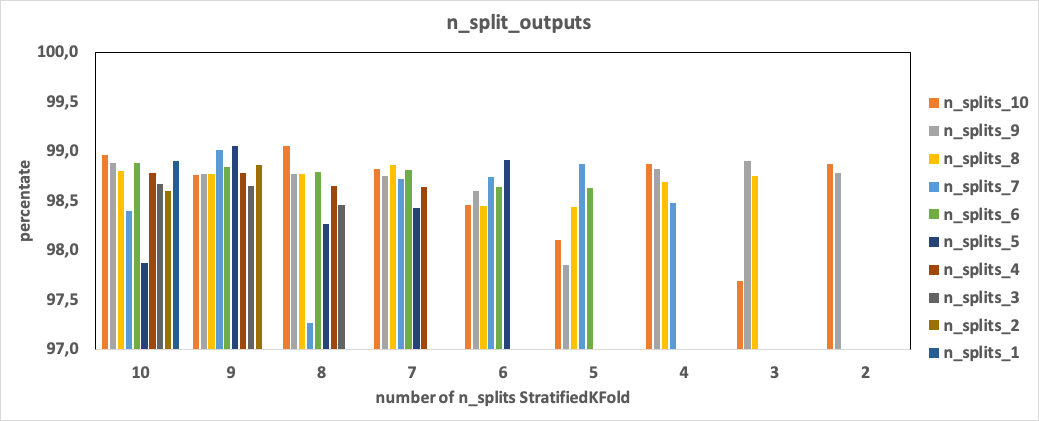

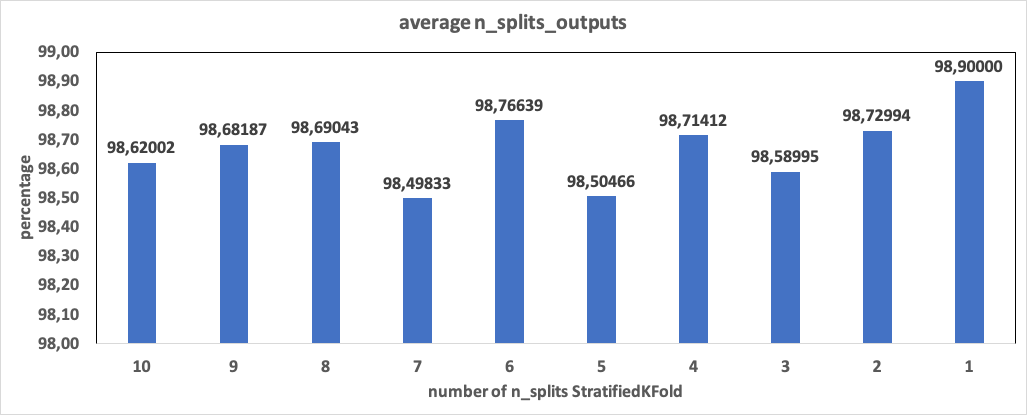

Based on the optimization or ideal StrtifiedKFold split, the data suggests that a n_split = 6, would produce the optimal model! Values < 5 is somewhat problematic since they only have a few values to build the average. 

In [36]:
strikfold_6 = StratifiedKFold(n_splits = 6,  random_state = 42)

for train_index, test_index in strikfold_6.split(X_train, y_train_0):
    clone_clsi = clone(m_sgd_clsi)
    X_train_fld = X_train[train_index]
    y_train_fld = y_train_0[train_index]
    
    X_test_fld = X_train[test_index]
    y_test_fld = y_train_0[test_index]
    
    clone_clsi.fit(X_train_fld, y_train_fld)
    y_predict = clone_clsi.predict(X_test_fld)
    n_corrt = sum(y_predict == y_test_fld)
    print(n_corrt / len(y_predict))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


0.9846
0.986
0.9845
0.9874
0.9864
0.9891


Now we use cross_val_score() function to evaluate our SGDClassifier model, using K-fold cross-validation with 6 folds (Based on above optimization on the average n_split value) 

In [37]:
from sklearn.model_selection import cross_val_score
cross_val_score(m_sgd_clsi, 
                X_train, 
                y_train_0, 
                cv= 6, 
                scoring = 'accuracy')

array([0.9846, 0.986 , 0.9845, 0.9874, 0.9864, 0.9891])

This accuracy is above 98.5% percent! Normally this is also a good indicator of overfitting. However, based on the result of others who used cv = 3 who obtain a 93% accuracy this is without performing the optimization on the n_split value (Reference Hands-On Machine Learning with Scikit-Learn, with Keras & TensorFlow, page 89 - 90, by Aurelien Geron) 

So optimization improved the model by 5.5 % which is quie a significant improvement on the model. Odendal, James PhD.

# Lets Test another Classifier 

In [38]:
from sklearn.base import BaseEstimator

class Never0Classifier(BaseEstimator):
    def fit(self, X, y = None):
        return self
    def predict(self, X):
        return np.zeros((len(X), 1), dtype = bool)

In [39]:
never_0_clsi = Never0Classifier()
cross_val_score(never_0_clsi, X_train, y_train_0, cv = 6, scoring = 'accuracy')

array([0.8999, 0.9007, 0.9033, 0.9037, 0.8992, 0.9009])

In [40]:
never_0_clsi10 = Never0Classifier()
cross_val_score(never_0_clsi10, X_train, y_train_0, cv = 10, scoring = 'accuracy')

array([0.90133333, 0.89766667, 0.90383333, 0.90033333, 0.90333333,
       0.9045    , 0.8985    , 0.90233333, 0.89883333, 0.90216667])

In [41]:
never_0_clsi9 = Never0Classifier()
cross_val_score(never_0_clsi9, X_train, y_train_0, cv = 9, scoring = 'accuracy')

array([0.9019049 , 0.89725514, 0.90175491, 0.90550472, 0.90265487,
       0.90235488, 0.90054005, 0.89828983, 0.90129013])

In [42]:
never_0_clsi8 = Never0Classifier()
cross_val_score(never_0_clsi8, X_train, y_train_0, cv = 8, scoring = 'accuracy')

array([0.90066667, 0.89986667, 0.90093333, 0.90373333, 0.90626667,
       0.89813333, 0.8992    , 0.90146667])

In [43]:
never_0_clsi7 = Never0Classifier()
cross_val_score(never_0_clsi7, X_train, y_train_0, cv = 7, scoring = 'accuracy')

array([0.89990667, 0.9009566 , 0.90363976, 0.90269513, 0.89977832,
       0.90047836, 0.90152841])

In [44]:
never_0_clsi6 = Never0Classifier()
cross_val_score(never_0_clsi6, X_train, y_train_0, cv = 6, scoring = 'accuracy')

array([0.8999, 0.9007, 0.9033, 0.9037, 0.8992, 0.9009])

In [45]:
never_0_clsi5 = Never0Classifier()
cross_val_score(never_0_clsi5, X_train, y_train_0, cv = 5, scoring = 'accuracy')

array([0.8995    , 0.90208333, 0.90391667, 0.90041667, 0.9005    ])

In [46]:
never_0_clsi4 = Never0Classifier()
cross_val_score(never_0_clsi4, X_train, y_train_0, cv = 4, scoring = 'accuracy')

array([0.90026667, 0.90233333, 0.9022    , 0.90033333])

In [47]:
never_0_clsi3 = Never0Classifier()
cross_val_score(never_0_clsi3, X_train, y_train_0, cv = 3, scoring = 'accuracy')

array([0.9003 , 0.9035 , 0.90005])

In [48]:
never_0_clsi2 = Never0Classifier()
cross_val_score(never_0_clsi2, X_train, y_train_0, cv = 2, scoring = 'accuracy')

array([0.9013    , 0.90126667])

This classifier accuracy is 90% not bad but horrible compared to the of 98.5 % form SGDClassifier model, even with an optimization of the cv = 2, the accuracy does not change at all and remains 90 % un like SGDClassifier model

# Confusion Matrix 

A much better way of evaluating classifiers is to look at the confusion matrix.

For example how well does the model know the number of times the classifier confused images 0s with 6s, you would look in th efith row and third column of the confusion matrix. 

In [49]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(m_sgd_clsi,
                                 X_train,
                                 y_train_0,
                                 cv = 6)

cross_val_predict() performs K-fold cross-validation however its instead of returning the evaluation scores, it returns the predictions based on the number of folds selected( cv = ?). 

lets call the confusion matrix using the confusion_matrix() function by passing the target classes (y_train_0) and predict classes y_train_pred

In [50]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_0, y_train_pred)

array([[53556,   521],
       [  299,  5624]])

Both rows in a confusion matrix can be assigned to actual class, while the column represents a predicted class. 

Row 1 of the above matrix considers non-0 images (Negative class):

This means that 53556 of them were correctly classified as non-0s (True Negative - TN). 

The remaining 521 were wrongly classified as 0s (False Positives - FP).

Row 2 of the above matrix cosideres the images of 0s (postive class):
This means that 299 of the images of non-0s were wrongly classified as non-0s (False Negatives - FN). 

The remaining 5624 were correctly classified as 0s (True Positives - TP). 

In [51]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_0, y_train_pred) 

# TP / TP + FP = 5624 / 5624 + 521

0.9152156224572824

In [52]:
recall_score(y_train_0, y_train_pred)

# TP / TP + FN = 5624 / 5624 + 5215624 / 5624 + 299

0.9495188249198041

This claims an image containing a 0, it is correct about 91.5% of the time, and it only detects 95% of the 0s.

This is still pretty AWESOM!

If one combine the precision and recall into a single metric its called F1-score

In [53]:
from sklearn.metrics import f1_score

f1_score(y_train_0, y_train_pred) 

# TP / TP + (FN + FP) / 24096 / (4096 + (1522 + 1325) / 2)

0.9320517069937023

f1_score usually favours classifiers with similar precision and recall values. One generally in some cases care about the precision and in other about the recall 

# Evaluating the Precision / Recall Trade-off

A fundamental trade-off between precision and recall, if our model has a high precision we generally expect a it to have a low recall. In our model with high recall, we had low precision. 

Setting the classifiers threshold also has a enourmous impact on the precision and recall. 

Scikit-learn do not provide direct tunability of the threshold, but is allow you access to the decision score that it uses to make predictions. So, instead of calling hte claissifiers predict() method, you can call its decision_function() method, which returnsa score for each instance allow you to use the threshold you want to make the prediction. Lets see if we can apply this to our model see code below. 



In [54]:
y_score = m_sgd_clsi.decision_function([some_digit])

y_score

array([-24021.82426622])

Setting the threshold

In [55]:
# Precision = 0.9152156224572824
# Recall    = 0.9495188249198041

# y_score(value) = array([-24021.82426622])

threshold = [0]
y_some_digit_pred = (y_score > threshold)
y_some_digit_pred

array([False])

In [56]:
# Precision = 0.9152156224572824
# Recall    = 0.9495188249198041

threshold = [-30000, -25000, -20000, -10000, 0, 10000, 20000, 30000]
y_some_digit_pred = (y_score > threshold)
y_some_digit_pred

array([ True,  True, False, False, False, False, False, False])

This confirm that if we increase the threshold recall decreases. This means that images actually represents a 0, and the classifiers detects it when the threshold is increased into the negative direction but is missing is as soon as the threshold is > -24021.82426622. 

In [57]:
y_score = cross_val_predict(m_sgd_clsi,
                            X_train, 
                            y_train_0, 
                            cv = 6, 
                            method = 'decision_function'
                           )

In [58]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_0, y_score)

Saving figure precision_recall_vs_threshold_plot


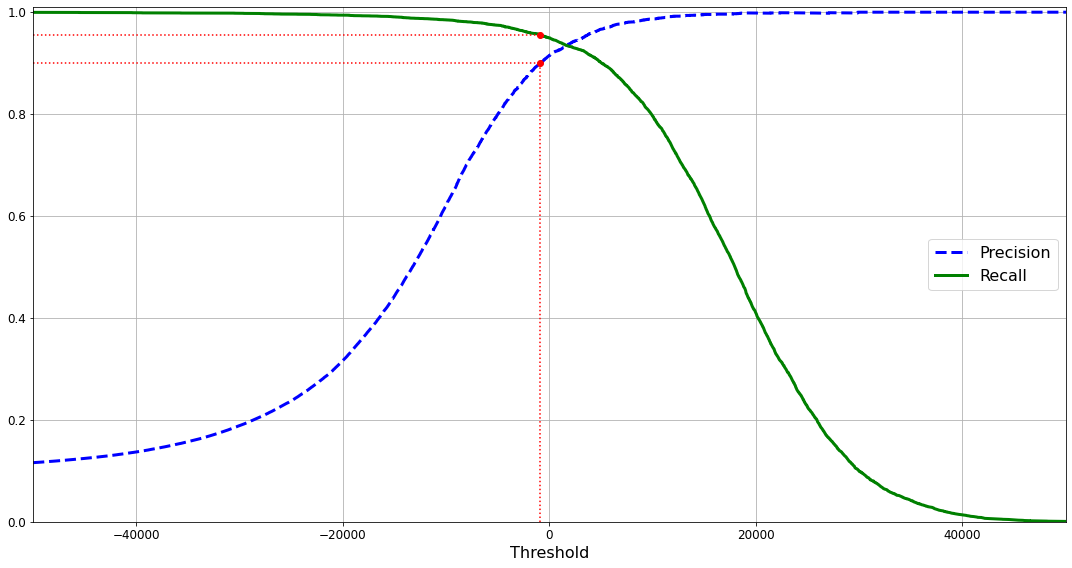

In [59]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=3)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=3)
    plt.legend(loc="center right", fontsize=16) 
    plt.xlabel("Threshold", fontsize=16)       
    plt.grid(True)                              
    plt.axis([-50000, 50000, 0, 1.01])             

# Precision = 0.9152156224572824 = 0.92
# Recall    = 0.9495188249198041 = 0.95

recall_90_precision = recalls[np.argmax(precisions >= 0.90)]
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]


plt.figure(figsize=(15, 8))                                                                  
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.plot([threshold_90_precision, threshold_90_precision], [0., 0.90], "r:")                 
plt.plot([-50000, threshold_90_precision], [0.90, 0.90], "r:")                                
plt.plot([-50000, threshold_90_precision], [recall_90_precision, recall_90_precision], "r:")
plt.plot([threshold_90_precision], [0.90], "ro")                                             
plt.plot([threshold_90_precision], [recall_90_precision], "ro")                             
save_fig("precision_recall_vs_threshold_plot")                                              
plt.show()

We can also plot precision vs recall for selecting good precision/recall trade-off 

In [60]:
(y_train_pred == (y_score > 0)).all()

True

Saving figure precision_vs_recall_plot


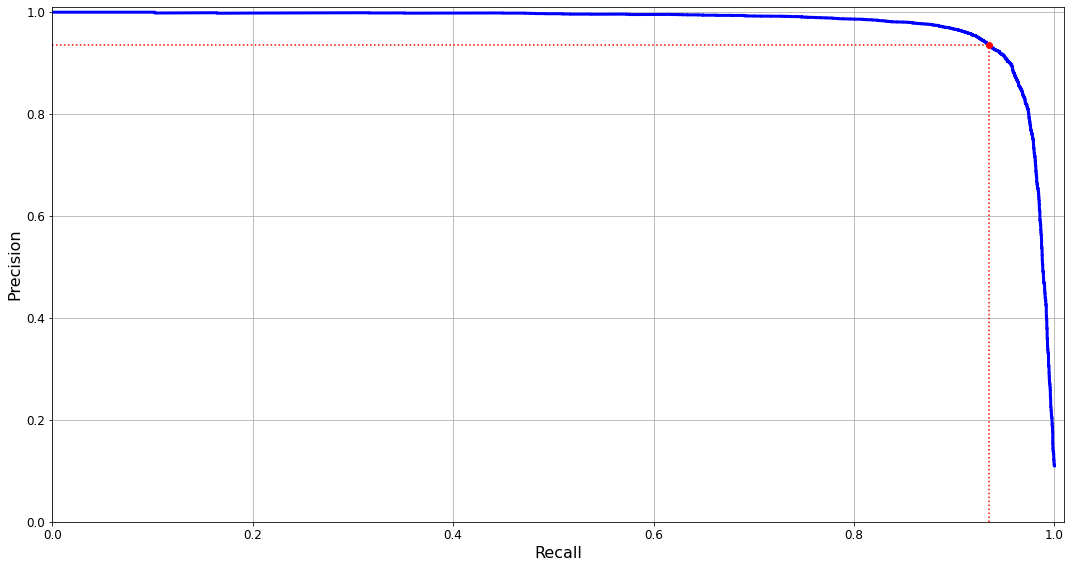

In [61]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=3)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1.01, 0, 1.01])
    plt.grid(True)

# Precision = 0.9152156224572824
# Recall    = 0.9495188249198041   
    
plt.figure(figsize=(15, 8))
plot_precision_vs_recall(precisions, recalls)
plt.plot([0.935, 0.935], [0., 0.935], "r:")
plt.plot([0.0, 0.935], [0.935, 0.935], "r:")
plt.plot([0.935], [0.935], "ro")
save_fig("precision_vs_recall_plot")
plt.show()

The precision starts falling rapidly at approximately 92 % recall, it would be best to select a precision/recall trade-off close to this value just before the precision starts falling rapidly. This is not a rule of thumb one should always consider what the projects outcomes are before playing around with these parameters. 

In [62]:
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]

In [63]:
threshold_90_precision

-902.2730677404625

In [64]:
y_train_pred_90 = (y_score >= threshold_90_precision)

In [65]:
precision_score(y_train_0, y_train_pred_90)

0.9

In [66]:
recall_score(y_train_0, y_train_pred_90)

0.9557656592942766

This means that the classifier is 90% 

# Receiver Operating Characteristics (ROC) curve

In [67]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_0, y_score)

Saving figure roc_curve_plot


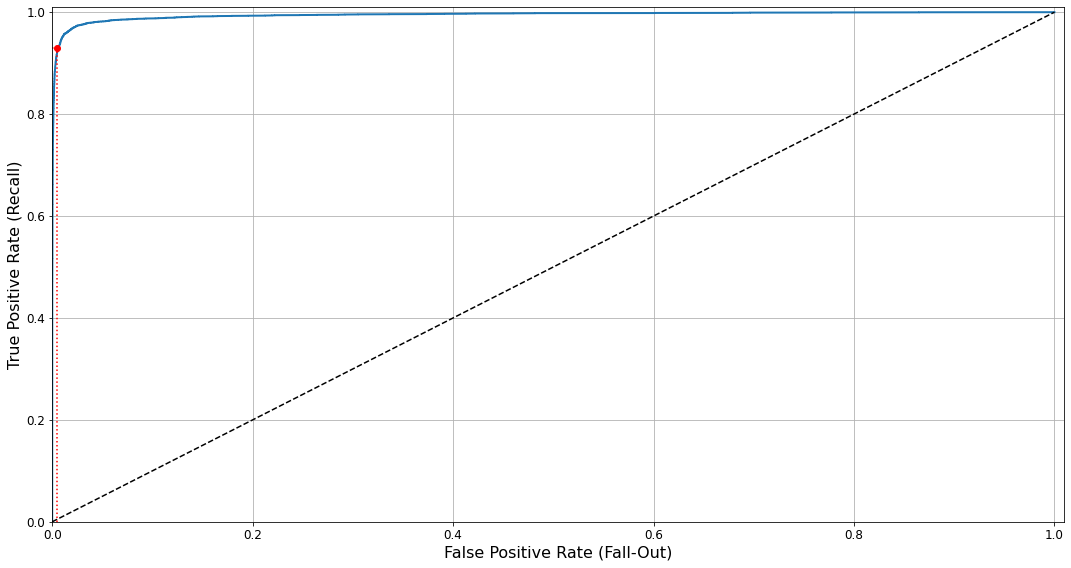

In [68]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1.01, 0, 1.01])                                    
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) 
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    
    plt.grid(True)                                            

# Precision = 0.9152156224572824
# Recall    = 0.9495188249198041   
    
plt.figure(figsize=(15, 8))                         
plot_roc_curve(fpr, tpr)
plt.plot([4.837e-3, 4.837e-3], [0., 0.93], "r:") 
plt.plot([0.0, 4.837e-3], [0.93, 0.93], "r:")  
plt.plot([4.837e-3], [0.93], "ro")               
save_fig("roc_curve_plot")                         
plt.show()

In [69]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_0, y_score)

0.994578915213011

In [70]:
from sklearn.ensemble import RandomForestClassifier

m_ranfortree_clf = RandomForestClassifier(n_estimators=100,
                                          random_state=42)

y_probas_forest = cross_val_predict(m_ranfortree_clf,
                                    X_train,
                                    y_train_0,
                                    cv=6,
                                    method="predict_proba")

In [71]:
y_scores_forest = y_probas_forest[:, 1] # score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_0, y_scores_forest)

Saving figure roc_curve_comparison_plot


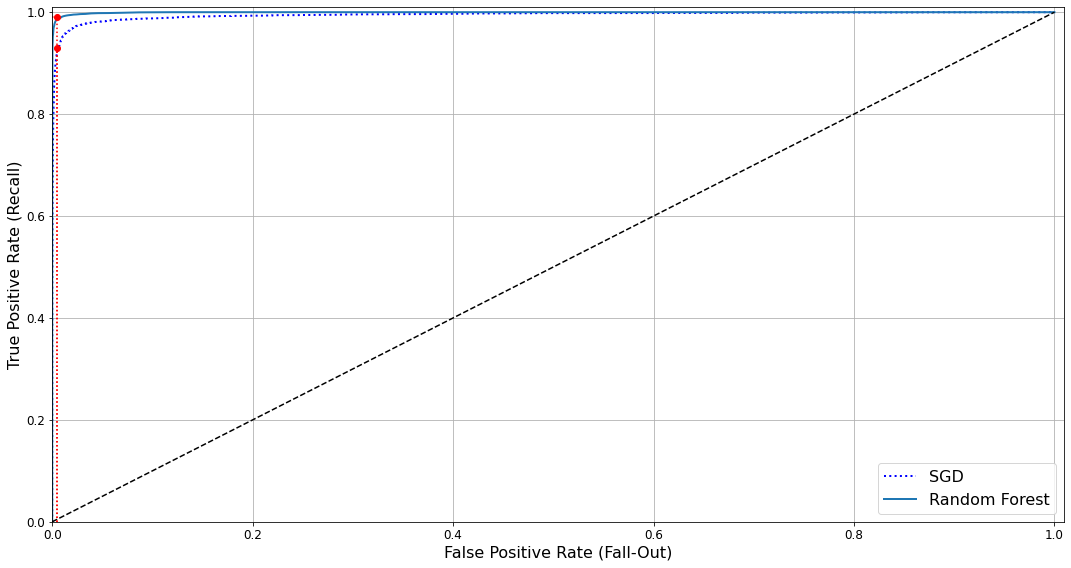

In [72]:
plt.figure(figsize=(15, 8))
plt.plot(fpr, tpr, "b:", linewidth=2, label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.plot([4.837e-3, 4.837e-3], [0., 0.99], "r:")
plt.plot([0.0, 4.837e-3], [0.99, 0.99], "r:")
plt.plot([4.837e-3], [0.99], "ro")
plt.plot([4.837e-3, 4.837e-3], [0., 0.93], "r:")
plt.plot([4.837e-3], [0.93], "ro")
plt.grid(True)
plt.legend(loc="lower right", fontsize=16)
save_fig("roc_curve_comparison_plot")
plt.show()

# Precision = 0.9152156224572824
# Recall    = 0.9495188249198041 

In [73]:
roc_auc_score(y_train_0, y_scores_forest)

0.9995694385558757

In [74]:
y_train_pred_forest = cross_val_predict(m_ranfortree_clf,
                                        X_train,
                                        y_train_0,
                                        cv=6)

precision_score(y_train_0, y_train_pred_forest)

0.9936619718309859

In [75]:
recall_score(y_train_0, y_train_pred_forest)

0.9528954921492487

The precision and recall score: 99.9% precision and 95.3% recall, this is quite nice!!

# Multiclass Classification

In [76]:
#from sklearn.svm import SVC

#m_svm_clf = SVC(gamma="auto", random_state=42)
#svm_clf.fit(X_train[:1000], y_train[:1000]) # y_train, not y_train_0
#m_svm_clf.predict([some_digit])

In [77]:
#some_digit_scores = m_svm_clf.decision_function([some_digit])
#some_digit_scores

In [78]:
#np.argmax(some_digit_scores)

In [79]:
#m_svm_clf.classes_

In [80]:
#m_svm_clf.classes_[0]

In [81]:
#from sklearn.multiclass import OneVsRestClassifier

#m_ovr_clf = OneVsRestClassifier(SVC(gamma="auto", random_state=42))
#m_ovr_clf.fit(X_train, y_train)
#m_ovr_clf.predict([some_digit])

In [82]:
#len(m_ovr_clf.estimators_)

In [83]:
#m_ovr_clf.fit(X_train, y_train)
#m_ovr_clf.predict([some_digit])

In [84]:
#m_sgd_clf.decision_function([some_digit])

In [85]:
#cross_val_score(m_sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

# SGDClassifiers

In [86]:
m_sgd_clsi.fit(X_train, y_train)
m_sgd_clsi.predict([some_digit])

array([3], dtype=uint8)

In [87]:
m_sgd_clsi.decision_function([some_digit])

array([[-28174.54606722, -35941.10993959,  -2692.35857394,
           714.72757726, -10947.01845936, -11155.91801358,
        -38264.71232905, -24909.91883584,  -4296.8925883 ,
        -11554.19426867]])

Here one can see that the classifier is fairly confident about the predictions most of the scores are negative apart from class 3 has a score of 714.7. Now this is a case where one has to evelauate the classifier. 

In [88]:
cross_val_score(m_sgd_clsi,
                X_train,
                y_train,
                cv=6,
                scoring="accuracy")

array([0.8764, 0.863 , 0.8807, 0.8546, 0.8694, 0.8895])

Another option is to scale the data to see if this improves our model using StandardScaler, this normally improves the model especially when we dealling with such a broad data range. 

In [89]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(m_sgd_clsi,
                X_train_scaled,
                y_train,
                cv = 6,
                scoring="accuracy")

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


array([0.902 , 0.8988, 0.8978, 0.8908, 0.8938, 0.9043])

# Error Analysis

Using confution matrix one can make predictions using the cross_val_predict() function then call the confusion_matrix() 

In [90]:
y_train_pred = cross_val_predict(m_sgd_clsi,
                                 X_train_scaled,
                                 y_train,
                                 cv = 6)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


array([[5573,    0,   19,    6,    8,   40,   35,    5,  236,    1],
       [   0, 6406,   39,   26,    3,   41,    4,    8,  204,   11],
       [  28,   25, 5238,   89,   69,   21,   62,   35,  381,   10],
       [  24,   18,  115, 5224,    0,  199,   23,   40,  419,   69],
       [  10,   13,   43,   10, 5207,   10,   31,   23,  337,  158],
       [  25,   15,   28,  156,   49, 4445,   74,   17,  551,   61],
       [  29,   16,   37,    4,   44,   87, 5550,    7,  144,    0],
       [  18,   11,   48,   24,   51,   15,    4, 5691,  194,  209],
       [  16,   59,   40,   94,    3,  114,   28,    9, 5447,   41],
       [  21,   19,   30,   65,  128,   34,    1,  174,  383, 5094]])

In [91]:
y_train_pred

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [92]:
# since sklearn 0.22, you can use sklearn.metrics.plot_confusion_matrix()
def plot_confusion_matrix(matrix):
    """If you prefer color and a colorbar"""
    fig = plt.figure(figsize=(20,10))
    ax = fig.add_subplot(111)
    cax = ax.matshow(matrix)
    fig.colorbar(cax)

Saving figure confusion_matrix_plot


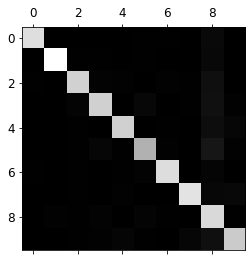

In [93]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
save_fig("confusion_matrix_plot", tight_layout=False)
plt.show()

AWESOME! confusion matrix looks pretty good! Seeing that most of the image are on the main diagonal line meaning they were classified correctly. Based on the squares intensity it looks like the 1s had the best classification, mean the model could classify the 1s quite well. Where the 5s were a bit difficult to classify, or the performance of the model on the 5s were not so great! 

When we divide each value in the confusion matrix by the number of images in the corresponding class so that you can compare error rates instead of absolute number of errors. 

In [94]:
row_sums = conf_mx.sum(axis = 1,
                      keepdims = True)

norm_conf_mx = conf_mx / row_sums

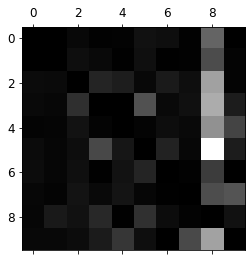

In [95]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap = plt.cm.gray)
plt.show()

Now it is possible to see that kind of errors that the classifier makes. The rows represents the actual classes, while columns represents predicted classes. The confusion matrix is also not so symmetrical.  

What is the most prominant feature of this plot, is the column 8 is quite bright relative to the others columns. This is an indicator that which implies that many images get missclassified as 8s. One the other hand the rows of 8s is not that bad and comparable to other rows. This also indicates that the actual 8s in general get properly classified as 8s. 

Another noticeable feature is that the 3s and 5s are often confused.

Saving figure error_analysis_digits_plot


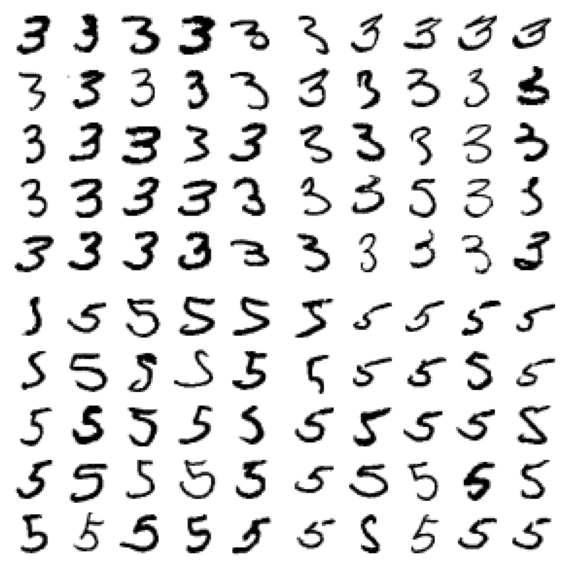

In [96]:
cl_a, cl_b = 3, 5
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)
save_fig("error_analysis_digits_plot")
plt.show()

# Google Colab is your friend GPU or TPU dont try to run this on your local PC if it is not AWESOM! (Hardware AWESOM!

# Multilabel classification

In [97]:
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

m_knn_clf = KNeighborsClassifier()
m_knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [98]:
m_knn_clf.predict([some_digit])

array([[False,  True]])

# This will take hours to run on normal computer be caseful on local pc!

In [99]:
y_train_knn_pred = cross_val_predict(m_knn_clf,
                                     X_train,
                                     y_multilabel,
                                     cv=6)
f1_score(y_multilabel, y_train_knn_pred, average="macro")

0.9779193382371922

In [100]:
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

In [2]:
some_index = 0
plt.subplot(121); plot_digit(X_test_mod[some_index])
plt.subplot(122); plot_digit(y_test_mod[some_index])
save_fig("noisy_digit_example_plot")
plt.show()


NameError: ignored

In [1]:
m_knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_test_mod[some_index]])
plot_digit(clean_digit)
save_fig("cleaned_digit_example_plot")

NameError: ignored